<a href="https://colab.research.google.com/github/Dlogical23/vegas/blob/master/DeshawnWEDAmini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2022-01-01 00:35:40   2022-01-01 00:53:29              2.0   
1         1  2022-01-01 00:33:43   2022-01-01 00:42:07              1.0   
2         2  2022-01-01 00:53:21   2022-01-01 01:02:19              1.0   
3         2  2022-01-01 00:25:21   2022-01-01 00:35:23              1.0   
4         2  2022-01-01 00:36:48   2022-01-01 01:14:20              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.80         1.0                  N           142           236   
1           2.10         1.0                  N           236            42   
2           0.97         1.0                  N           166           166   
3           1.09         1.0                  N           114            68   
4           4.30         1.0                  N            68           163   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \


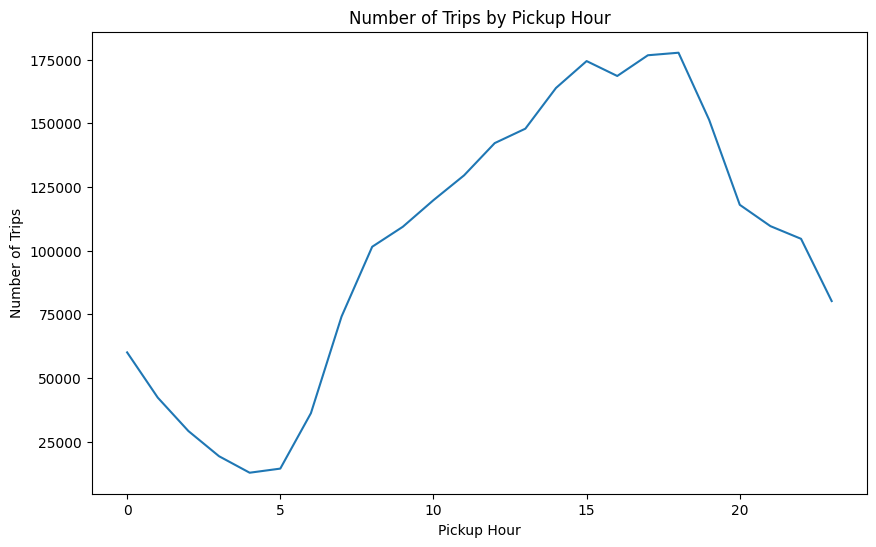

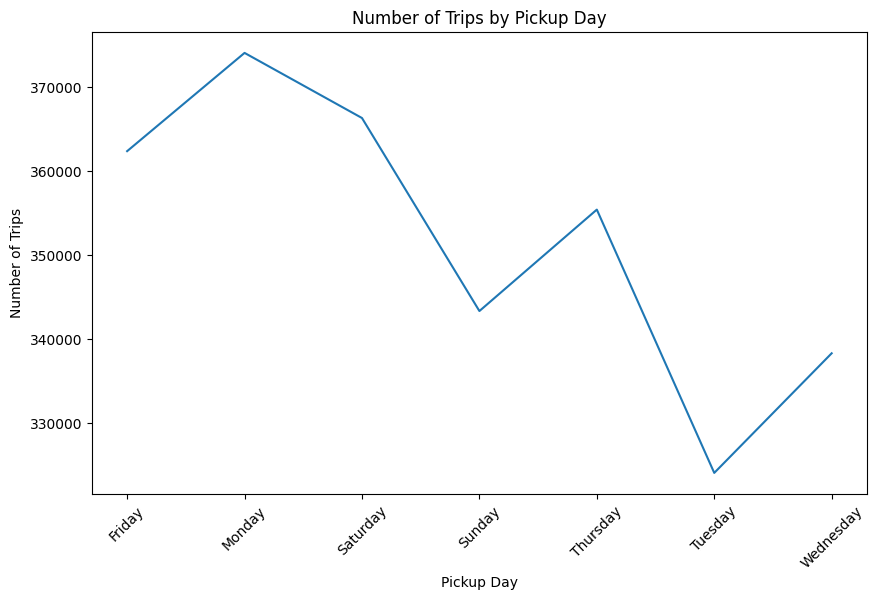

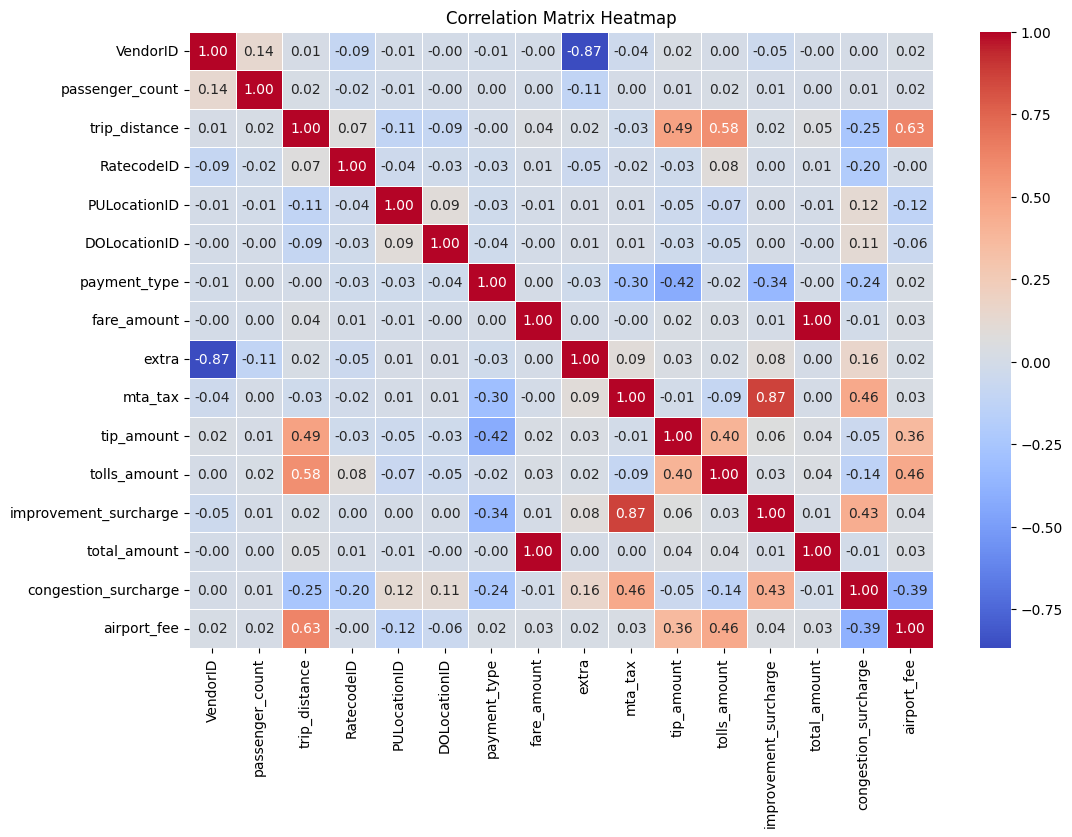

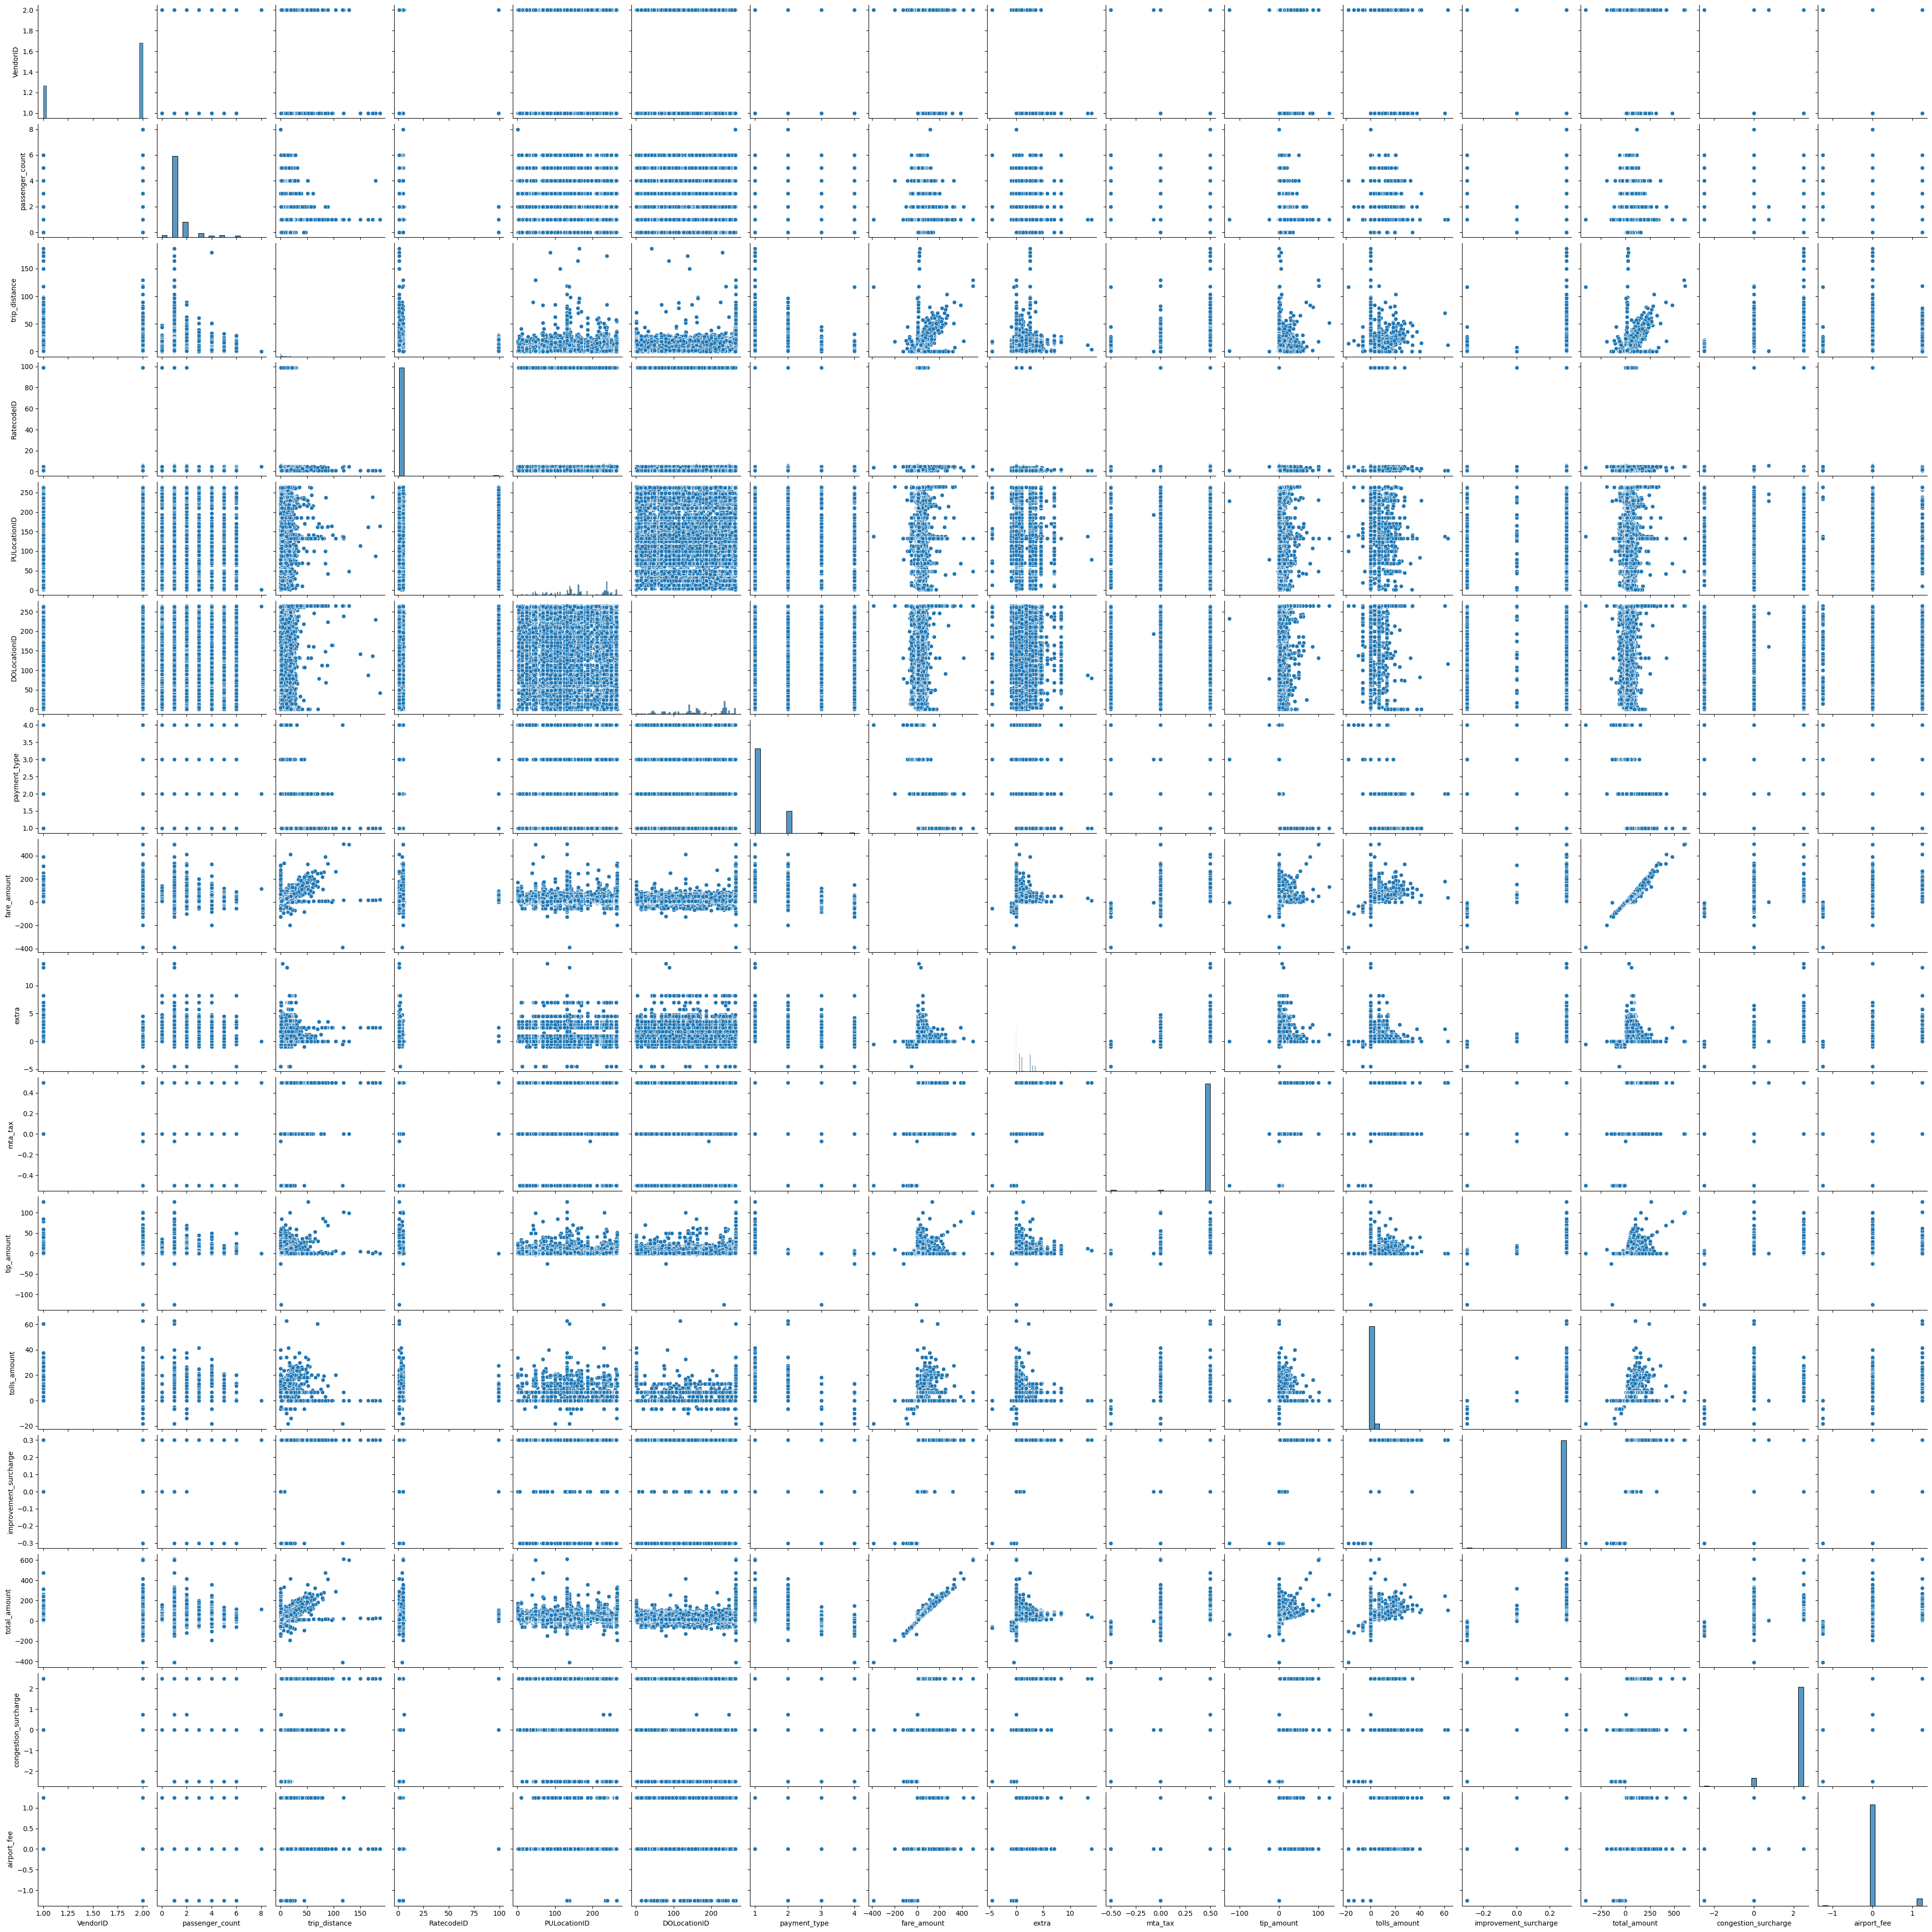

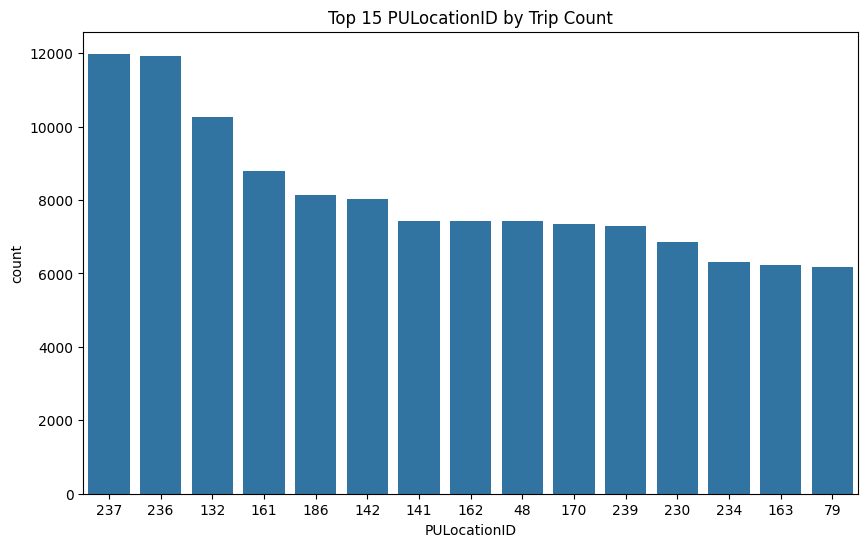

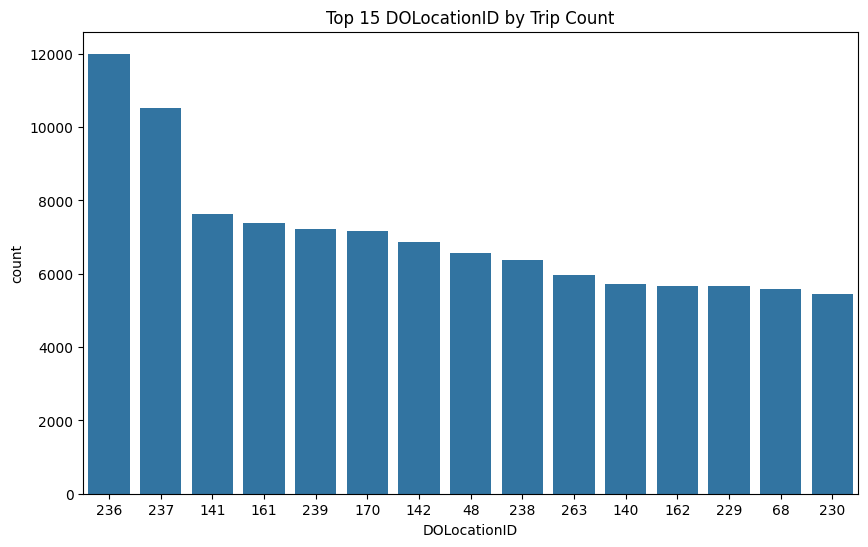

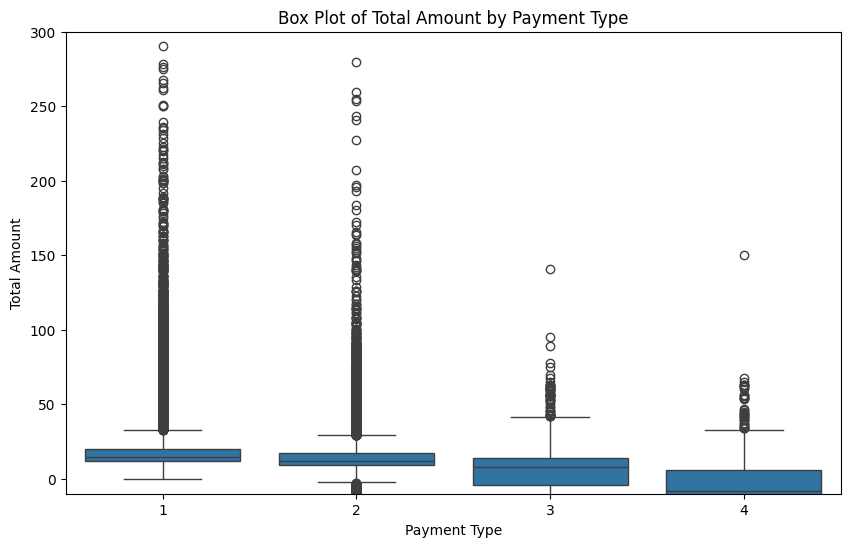

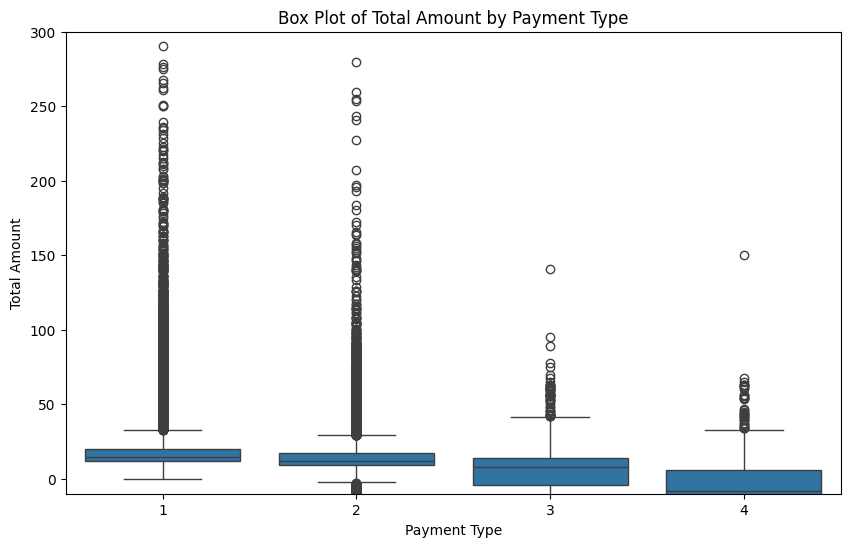

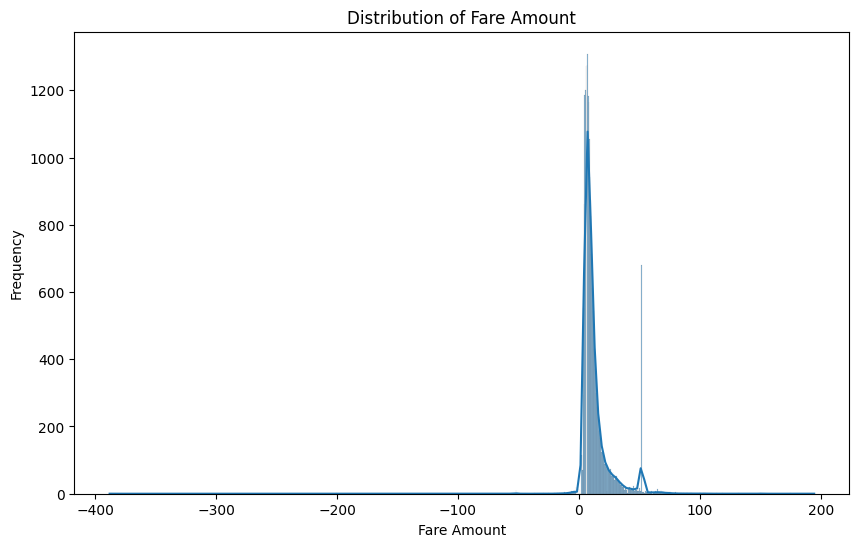

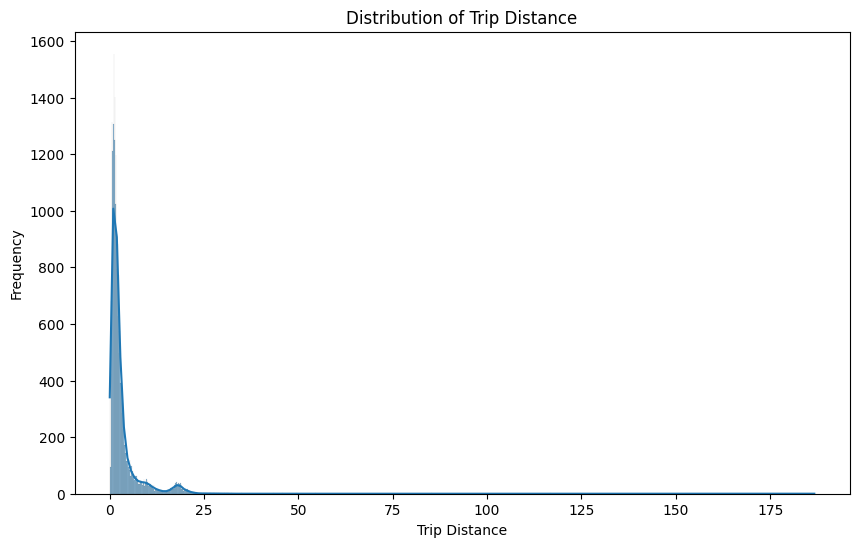

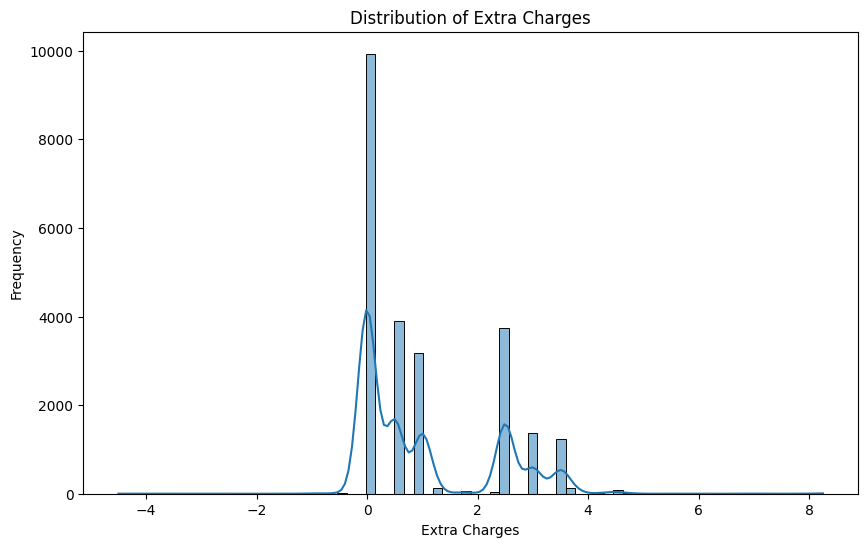

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load parquet file into a Pandas DataFrame
df = pd.read_parquet('/content/yellow_tripdata_2022-01.parquet')

# Display the first few rows of the dataset
print(df.head())

# Display the shape of the dataset
print(df.shape)

# Check for missing values
print(df.isnull().sum())

# Summary statistics of the dataset
print(df.describe())

# Drop rows with missing values
df_clean = df.dropna()

# Create a new column for trip duration in minutes
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

print(df[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'trip_duration']].head())

# Create new columns for pickup hour and day of week
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day_name()

print(df[['tpep_pickup_datetime', 'pickup_hour', 'pickup_day']].head())

# Create a lineplot displaying the number of trips by pickup hour
hourly_trips = df.groupby('pickup_hour').size()

plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_trips.index, y=hourly_trips.values)
plt.title('Number of Trips by Pickup Hour')
plt.xlabel('Pickup Hour')
plt.ylabel('Number of Trips')
# Show the plot
plt.show()

# Create a lineplot displaying the number of trips by pickup day
daily_trips = df.groupby('pickup_day').size()

plt.figure(figsize=(10, 6))
sns.lineplot(x=daily_trips.index, y=daily_trips.values)
plt.title('Number of Trips by Pickup Day')
plt.xlabel('Pickup Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
# Show the plot
plt.show()

# Compute the correlation matrix of numerical variables
corr_matrix = df_clean.corr(numeric_only=True)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Assuming df_clean is your cleaned DataFrame
df_clean = df_clean.sample(frac=0.1, random_state=42)

# Create a scatter plot matrix
sns.pairplot(df_clean)

# Show the plot
plt.show()

# Get the top 15 PULocationID values
top_pu = df_clean['PULocationID'].value_counts().nlargest(15).index

# Filter the DataFrame to only include the top 15 PULocationID values
df_top_pu = df_clean[df_clean['PULocationID'].isin(top_pu)]

# Create a count plot for PULocationID
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_pu, x='PULocationID', order=top_pu)
plt.title('Top 15 PULocationID by Trip Count')
plt.show()

# Get the top 15 DOLocationID values
top_do = df_clean['DOLocationID'].value_counts().nlargest(15).index

# Filter the DataFrame to only include the top 15 DOLocationID values
df_top_do = df_clean[df_clean['DOLocationID'].isin(top_do)]

# Create a count plot for DOLocationID
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_do, x='DOLocationID', order=top_do)
plt.title('Top 15 DOLocationID by Trip Count')
# Show the plot
plt.show()

# Create a box plot of total_amount by payment_type
plt.figure(figsize=(10, 6))
sns.boxplot(x='payment_type', y='total_amount', data=df_clean)
plt.title('Box Plot of Total Amount by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Total Amount')
plt.ylim(-10, 300)  # Set the y-axis limits if needed to better visualize the data
# Show the plot
plt.show()

# Create a box plot of total_amount by payment_type
plt.figure(figsize=(10, 6))
sns.boxplot(x='payment_type', y='total_amount', data=df_clean)
plt.title('Box Plot of Total Amount by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Total Amount')
plt.ylim(-10, 300)  # Set the y-axis limits if needed to better visualize the data
# Show the plot
plt.show()

# Sample the data if necessary
df_sample = df_clean.sample(frac=0.1, random_state=42)  # Adjust the fraction as needed

# Plot distribution of fare_amount
plt.figure(figsize=(10, 6))
sns.histplot(df_sample['fare_amount'], kde=True)
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
# Show the plot
plt.show()

# Plot distribution of trip_distance
plt.figure(figsize=(10, 6))
sns.histplot(df_sample['trip_distance'], kde=True)
plt.title('Distribution of Trip Distance')
plt.xlabel('Trip Distance')
plt.ylabel('Frequency')
# Show the plot
plt.show()

# Plot distribution of extra
plt.figure(figsize=(10, 6))
sns.histplot(df_sample['extra'], kde=True)
plt.title('Distribution of Extra Charges')
plt.xlabel('Extra Charges')
plt.ylabel('Frequency')
# Show the plot
plt.show()



